In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [11]:
matplotlib.style.use('ggplot')
palette = ['#D35453','#C59C4B','#D8ECC1','#1ECECB']
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)

In [3]:
data = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Datasets\\marketing_campaign.csv", sep = ';')

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [6]:
data.shape

(2240, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
categorical = ['Marital_Status','Education','Dt_Customer']
data[categorical].describe()

,Marital_Status,Education,Dt_Customer
count,2240,2240,2240
unique,8,5,663
top,Married,Graduation,2012-08-31
freq,864,1127,12


In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], dtype='object')

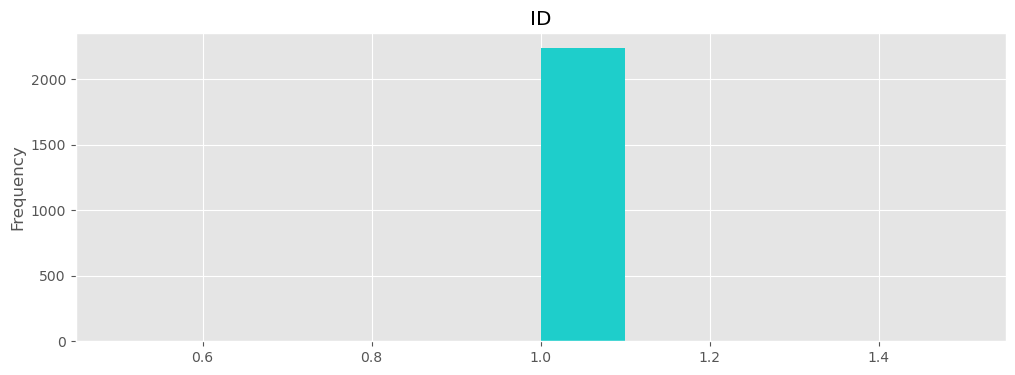

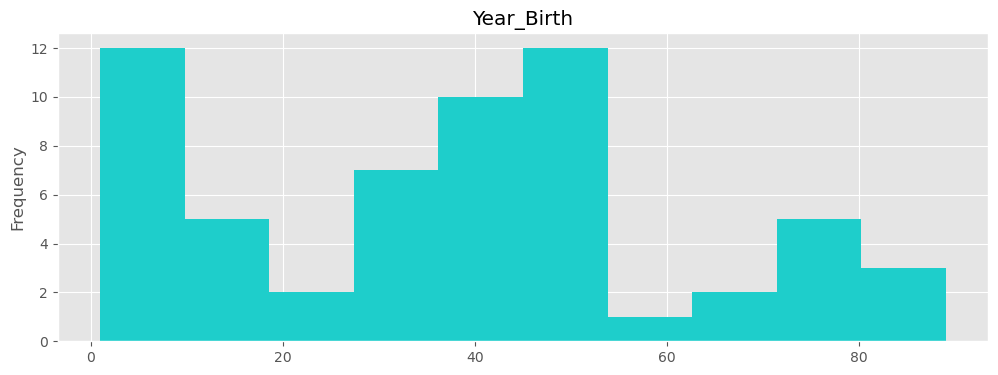

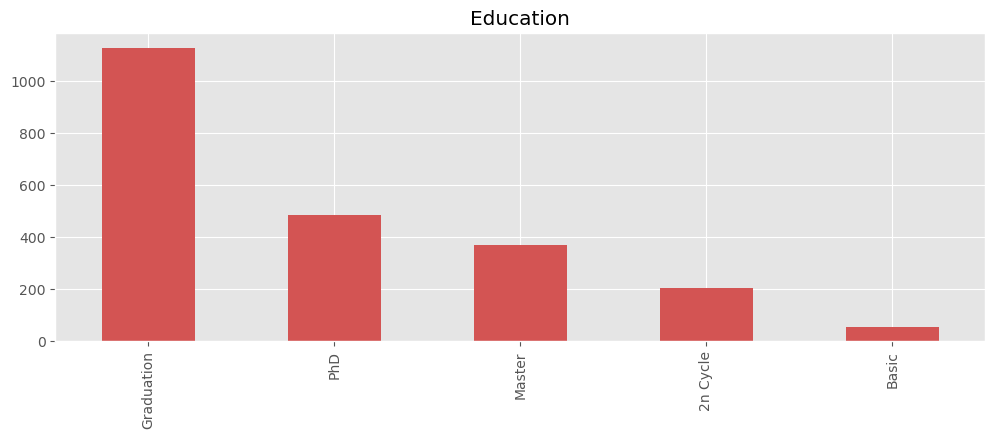

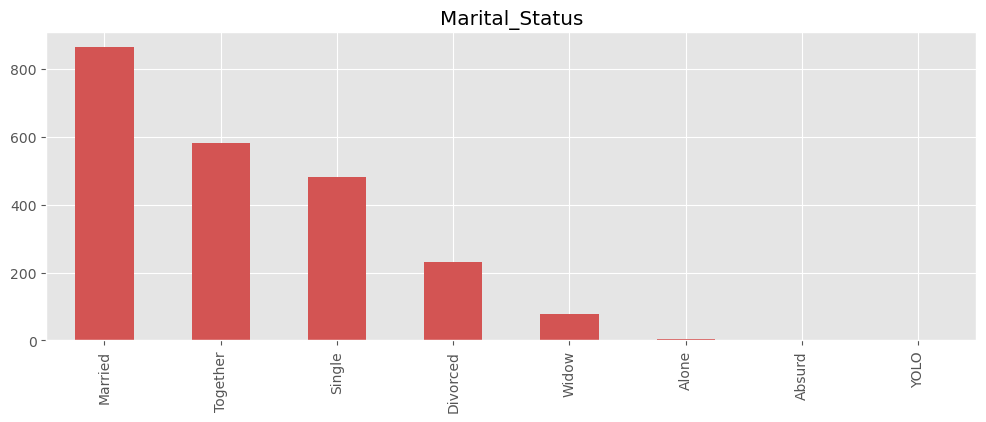

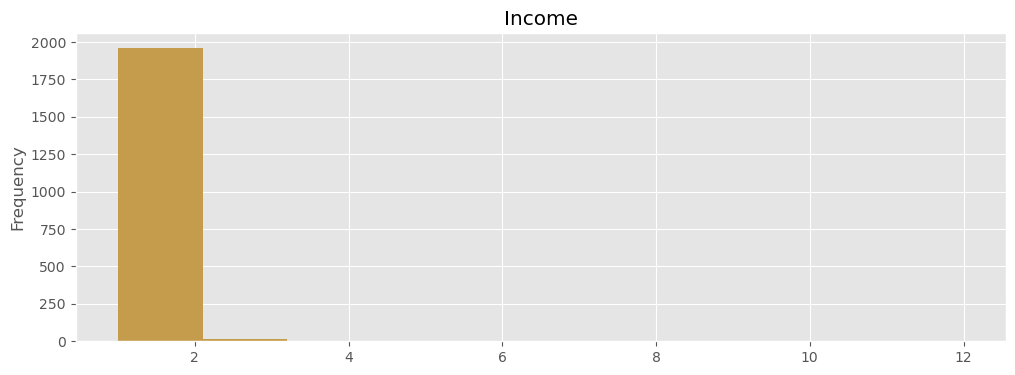

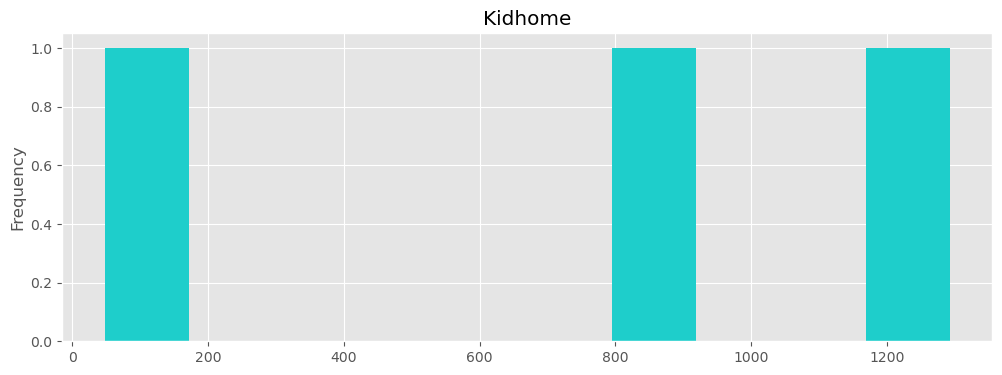

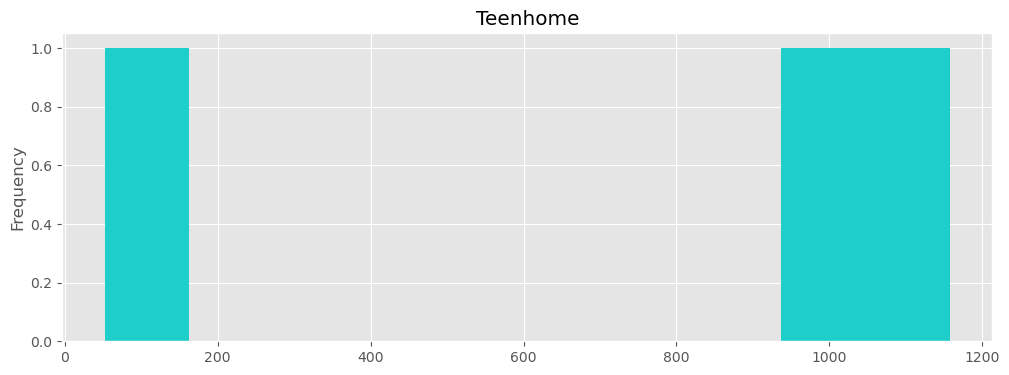

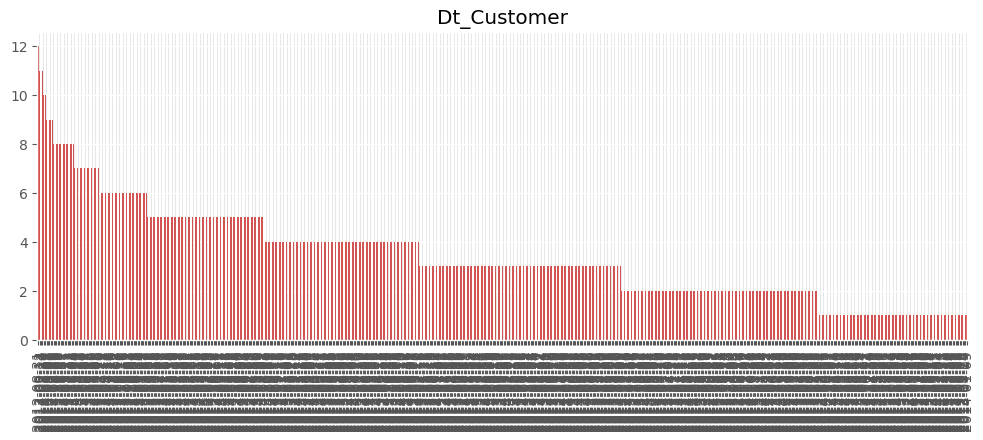

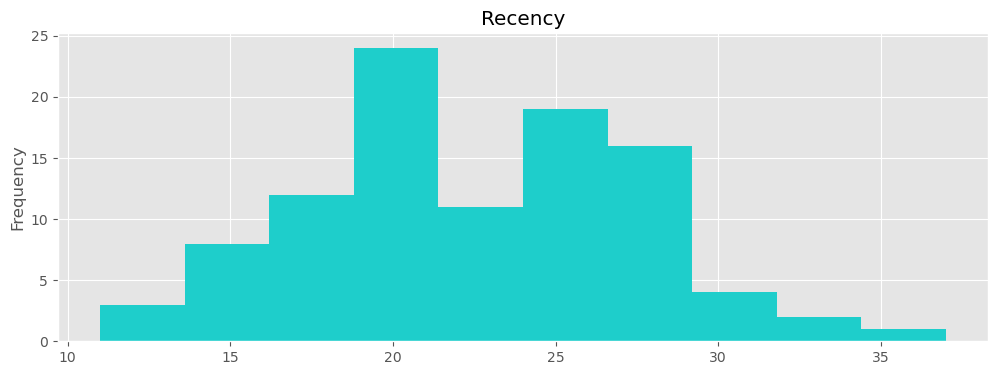

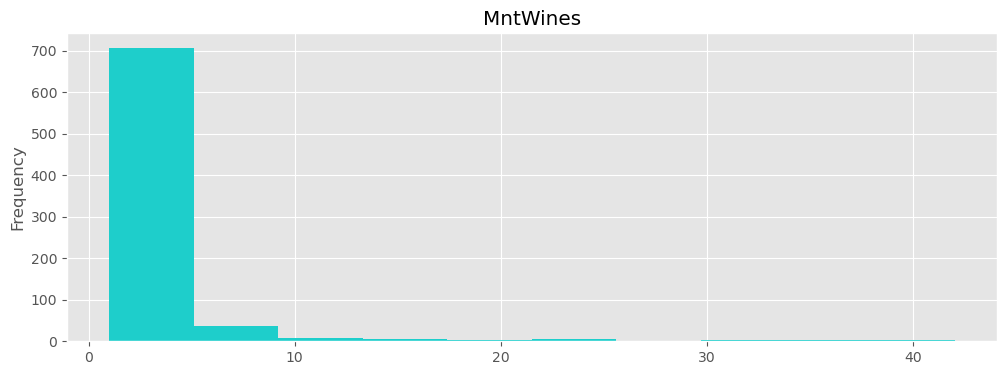

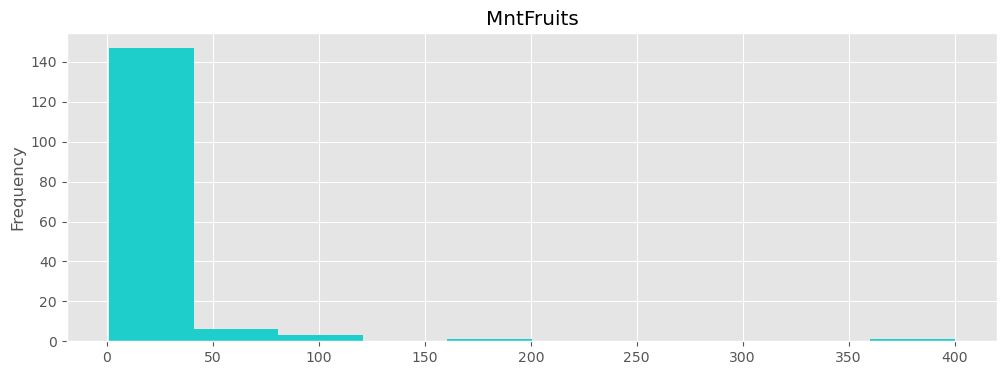

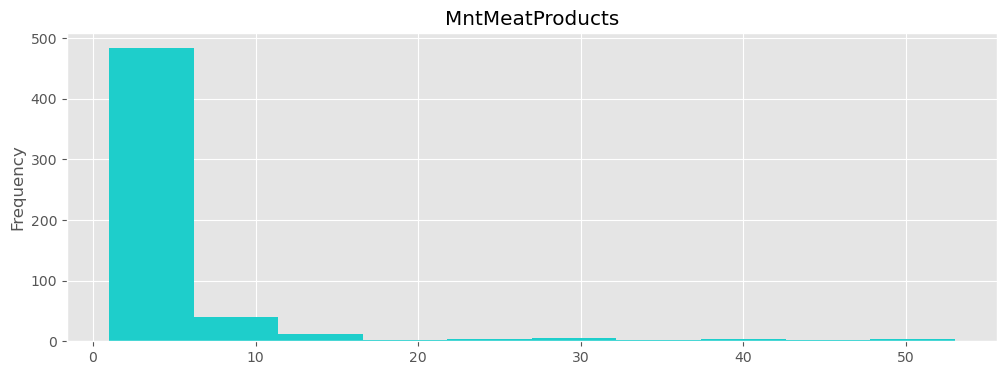

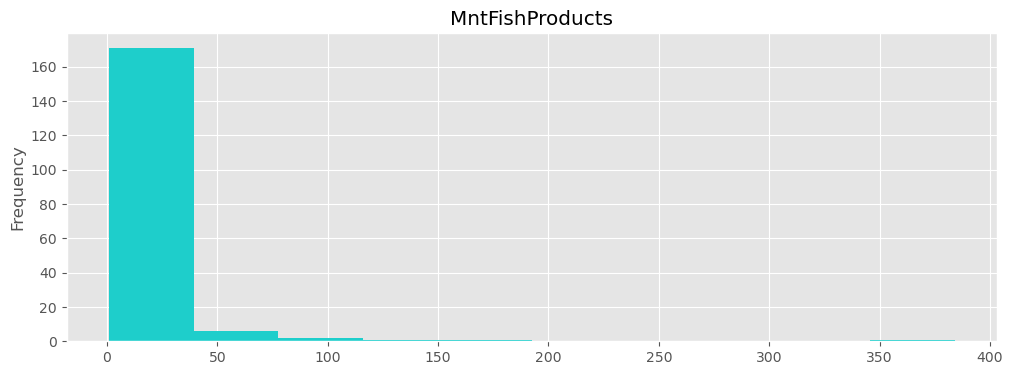

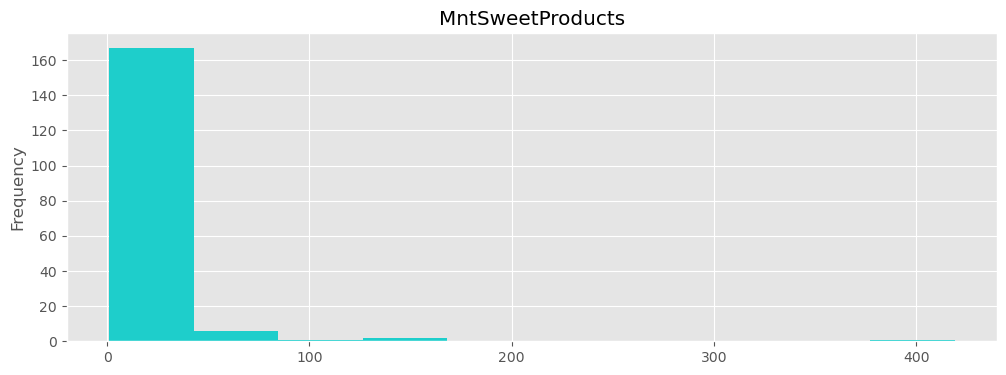

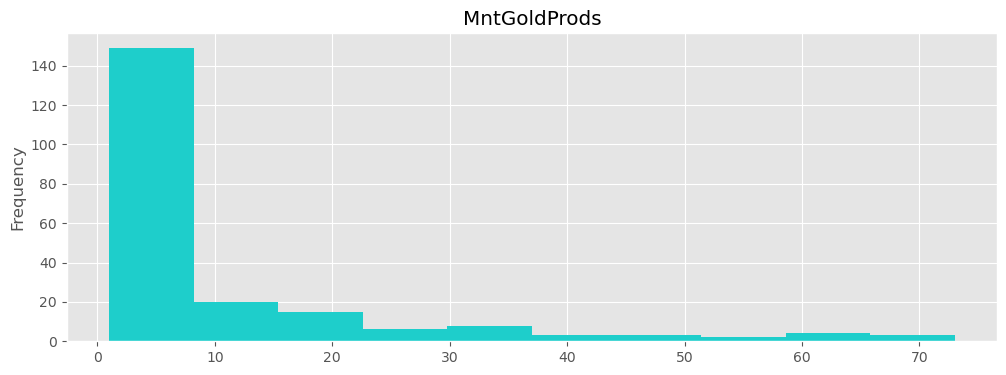

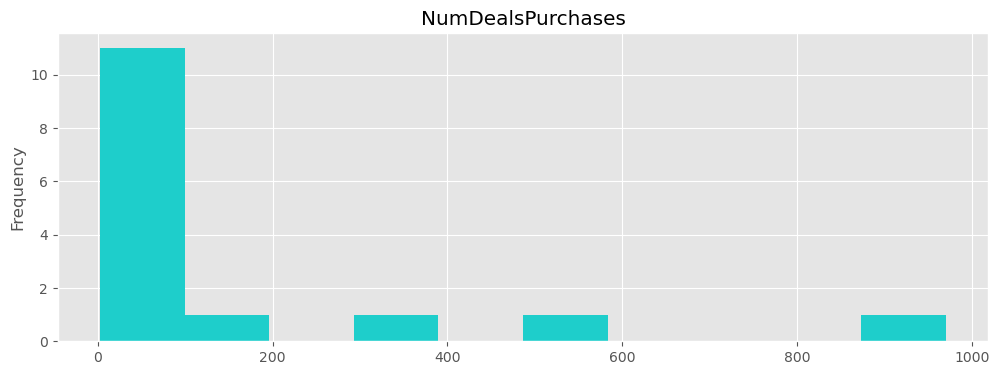

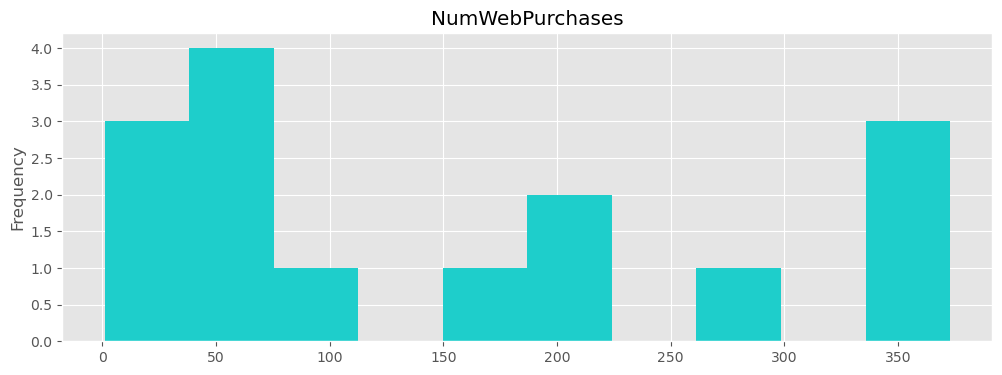

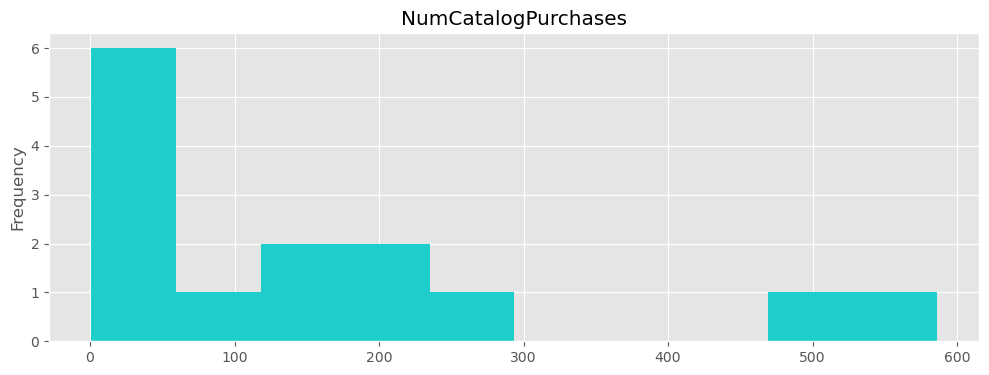

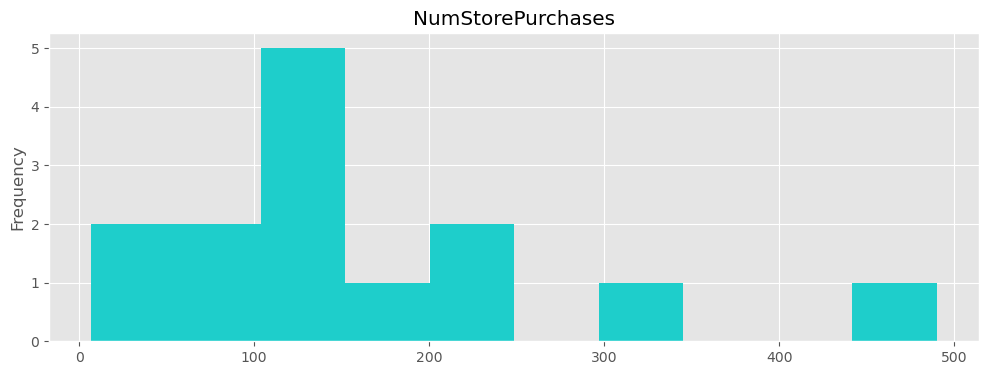

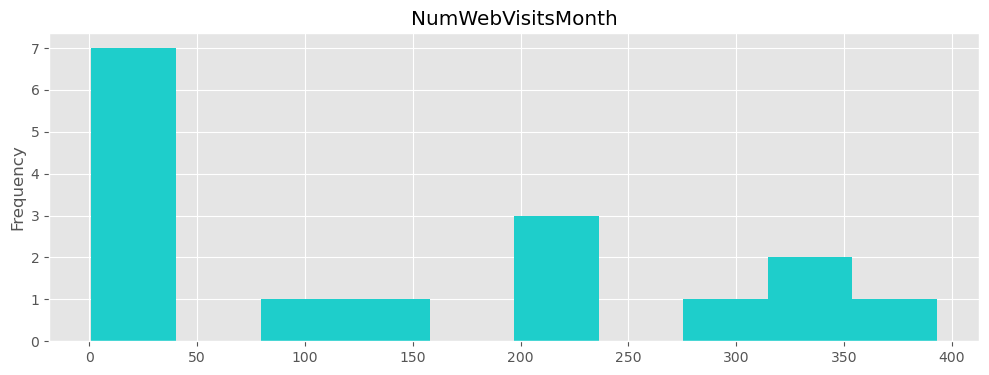

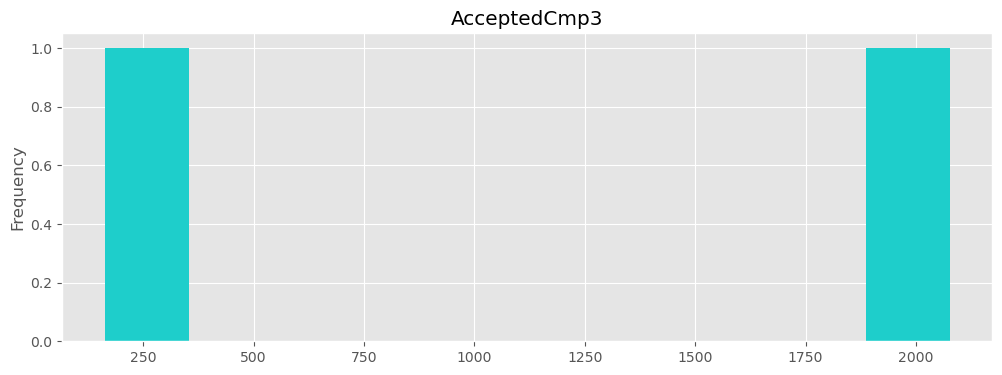

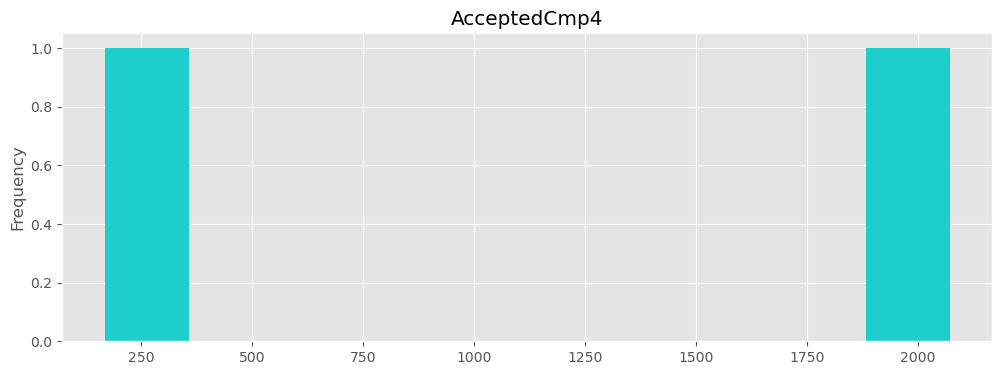

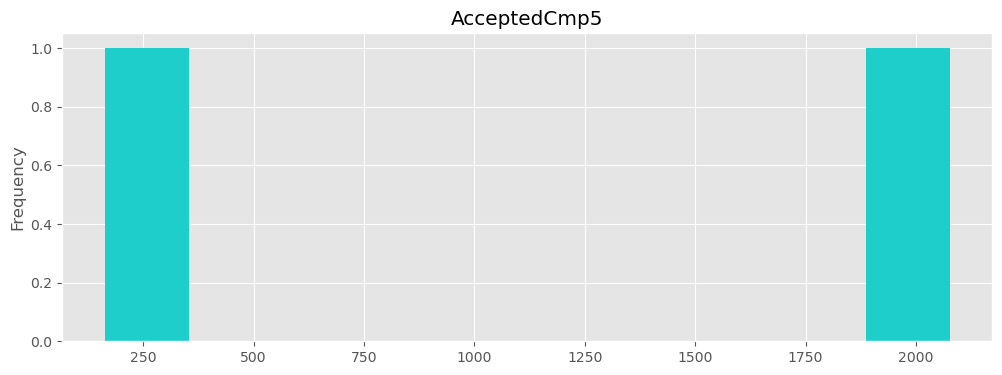

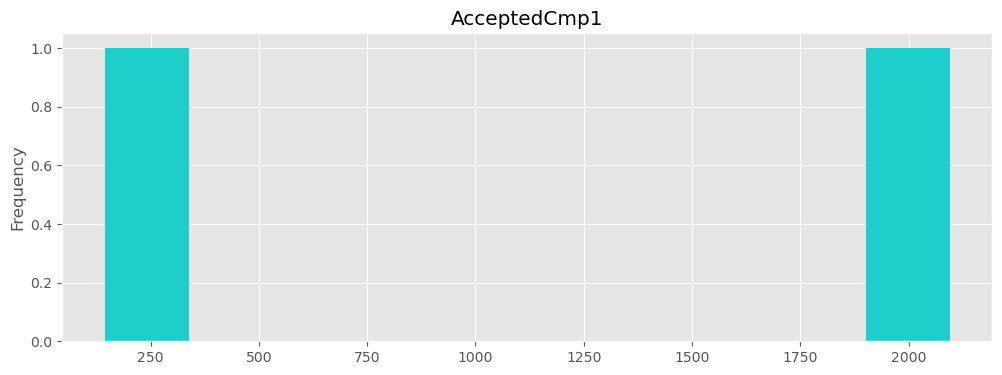

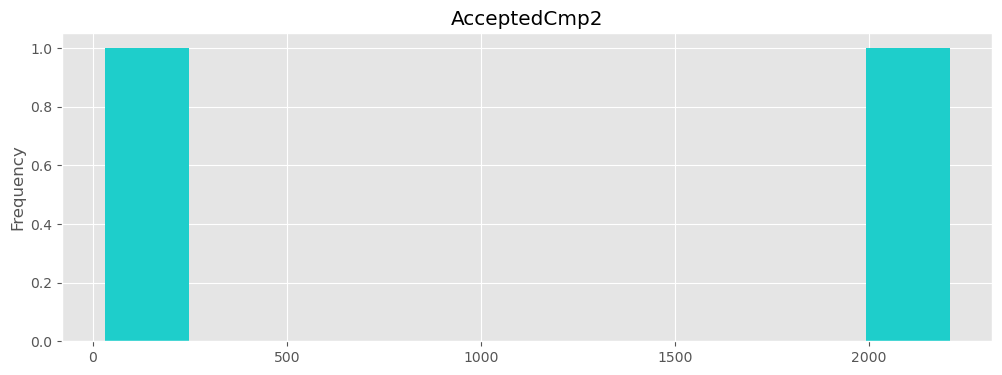

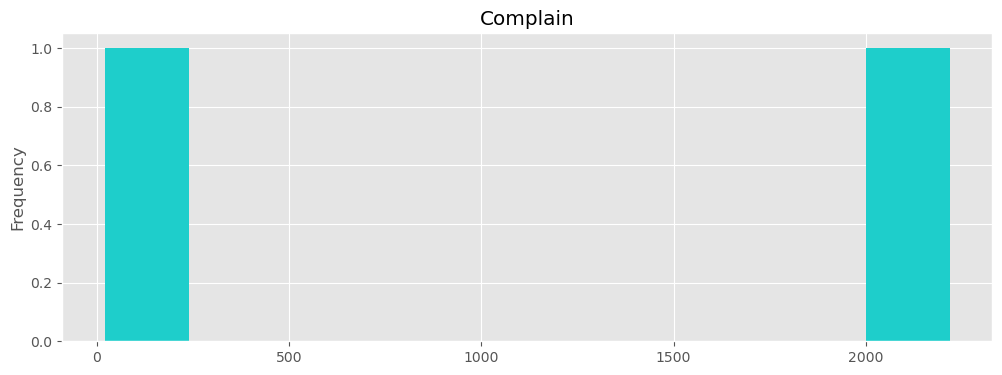

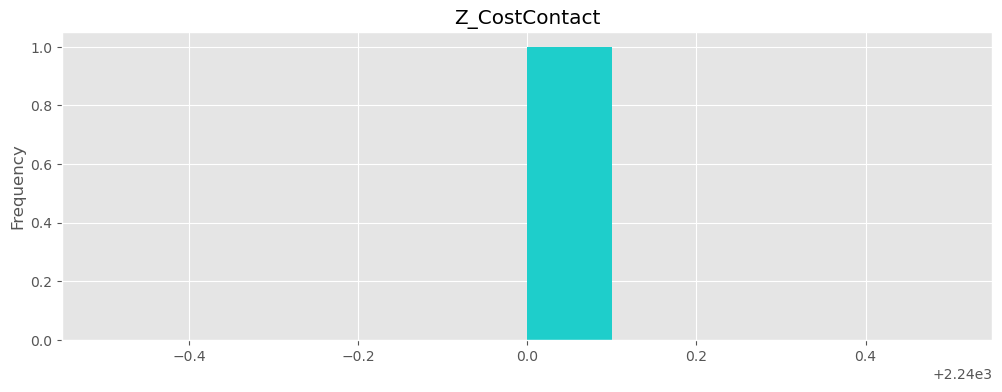

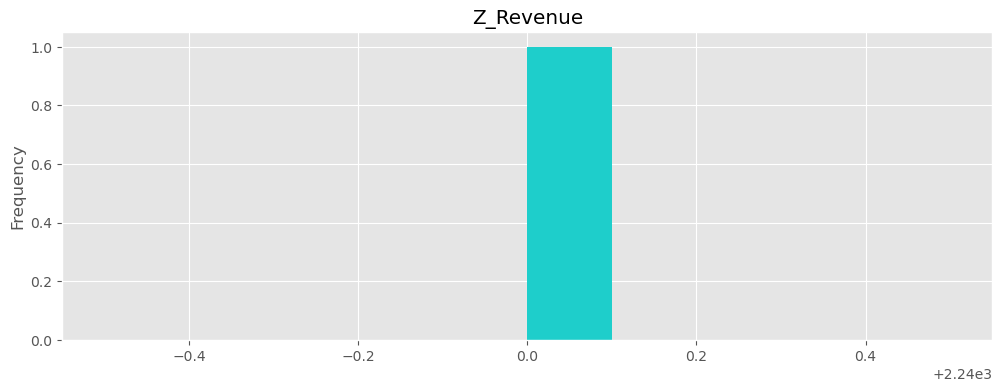

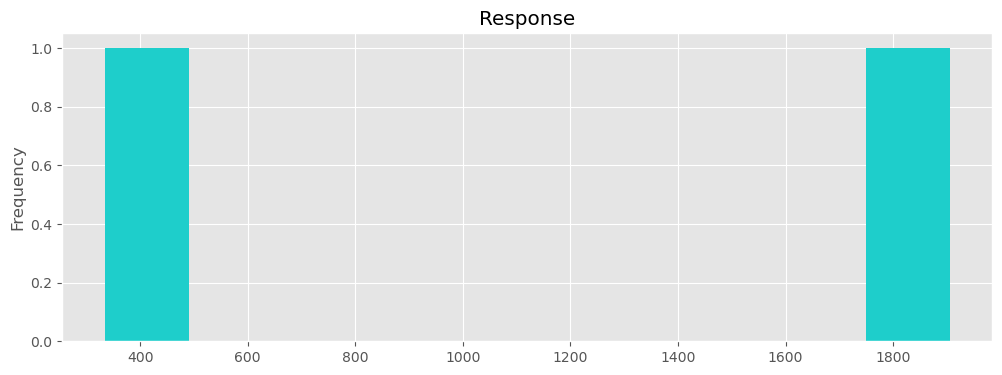

In [6]:
for feat in data.columns:
    if data[feat].dtype == 'object':
        data[feat].value_counts().plot(kind='bar', figsize=(12,4), title=feat, color=palette[0])
    elif data[feat].dtype == 'float64':
        data[feat].value_counts().plot(kind='hist', figsize=(12,4), title=feat, color=palette[1])
    else:
        data[feat].value_counts().plot(kind='hist', figsize=(12,4), title=feat, color=palette[3])
    plt.show()

In [12]:
data['Dt_Customer']

0       2012-09-04
1       2014-03-08
2       2013-08-21
3       2014-02-10
4       2014-01-19
           ...    
2235    2013-06-13
2236    2014-06-10
2237    2014-01-25
2238    2014-01-24
2239    2012-10-15
Name: Dt_Customer, Length: 2240, dtype: object

In [23]:
data['Month'] = pd.DatetimeIndex(data['Dt_Customer']).month

In [24]:
data['Month'].value_counts()

8     222
5     216
10    212
3     211
1     197
9     193
11    187
4     182
2     178
12    175
6     166
7     101
Name: Month, dtype: int64

In [ ]:
data[data['Income'] > 200000]

In [ ]:
data['Income'] = data['Income'].replace(666666.0, 66666.0)
data[data['Income'] > 200000]

In [ ]:
sns.swarmplot(data=data, x='Income',s=3)

In [7]:
maxv = data['Income'].max()
minv = data['Income'].min()
bns = [minv, 35000,65000,85000, maxv]
data['Income_cat'] = pd.cut(data['Income'], bins=bns, labels=bns[:-1])
grouped_data = data.groupby('Income_cat').agg({numeric_column: 'mean' for numeric_column in data.columns if pd.api.types.is_numeric_dtype(data[numeric_column])})
print(grouped_data)

                     ID   Year_Birth         Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
Income_cat                                                                                                                                                                                                                                                                                                                                                                                    
1730.0      5659.386861  1974.027372   25138.563869  0.791971  0.250000  48.156934   21.361314   5.950730        22.324818         8.591241          5.833942     16.266423           2.023723         2.003650             0.472628      

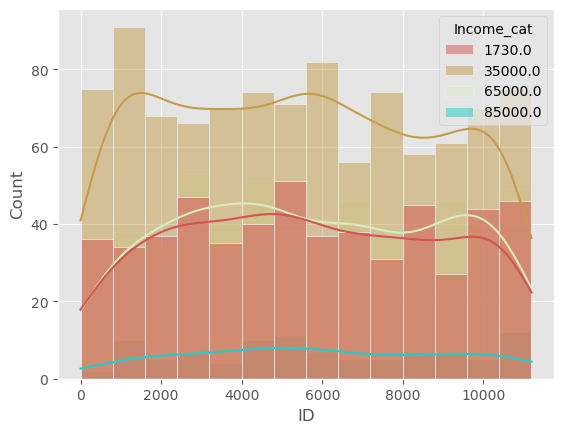

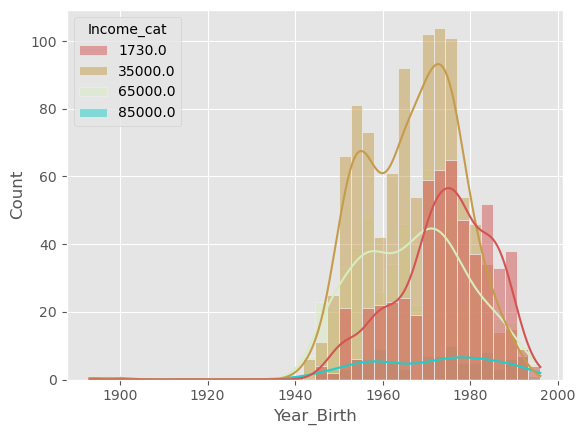

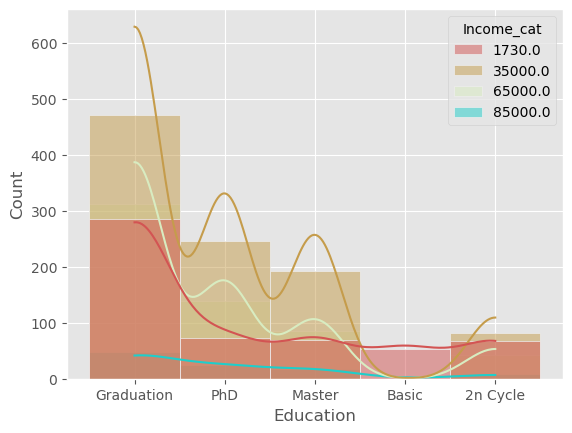

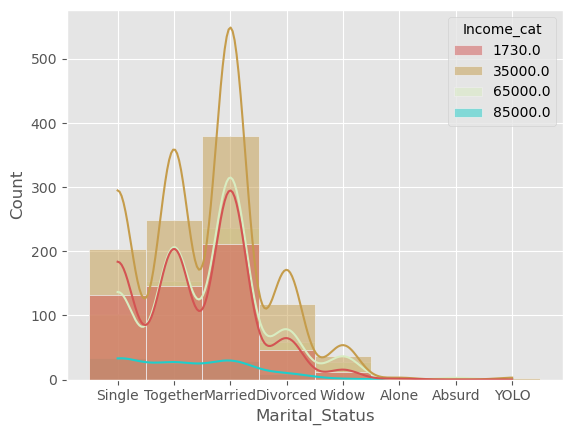

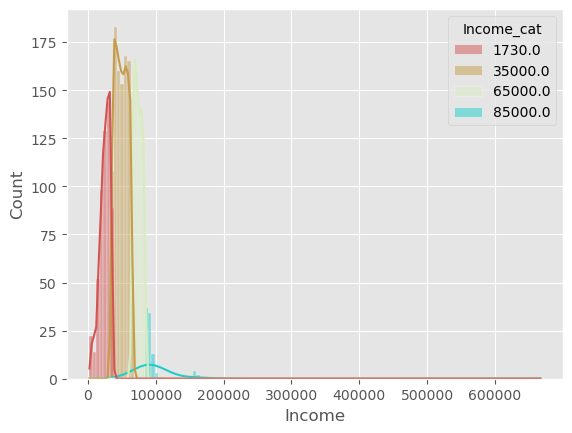

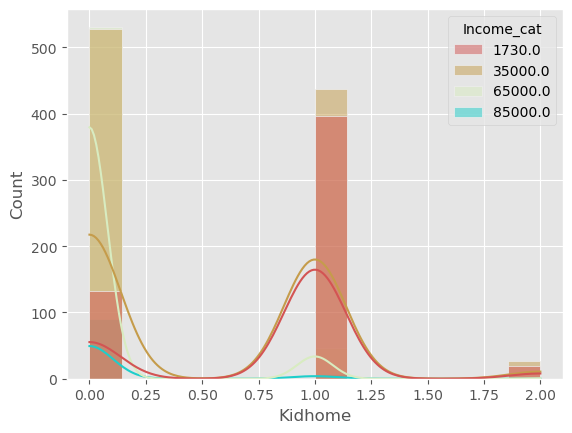

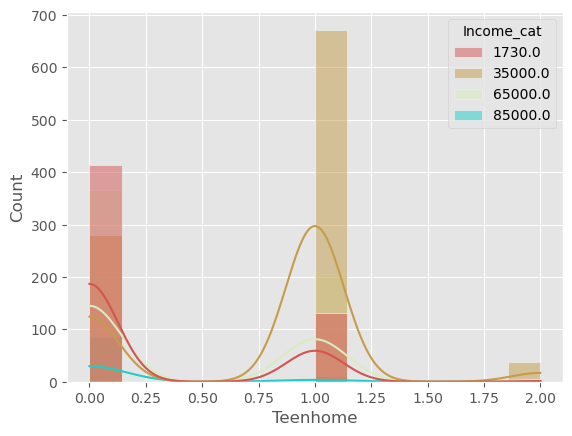

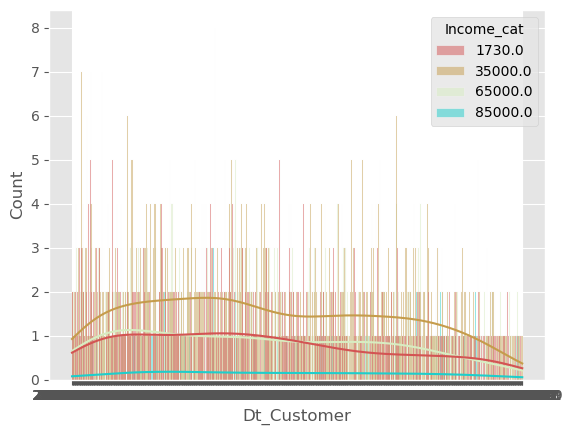

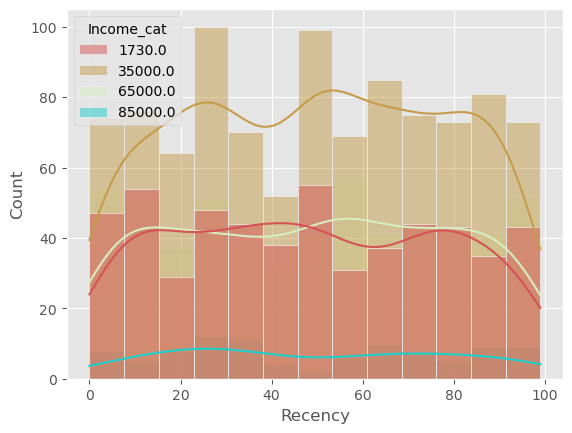

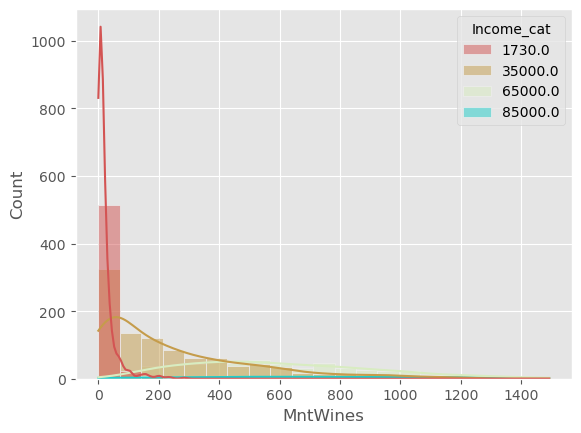

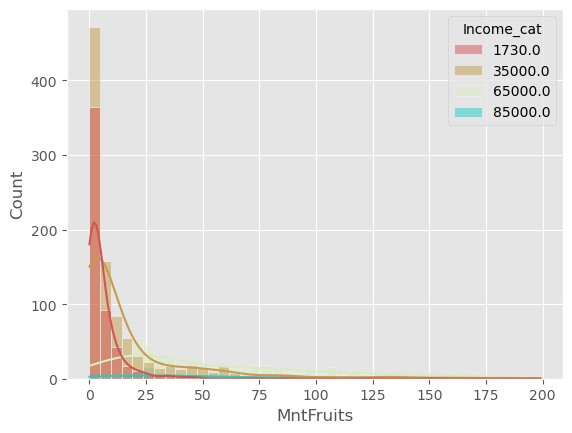

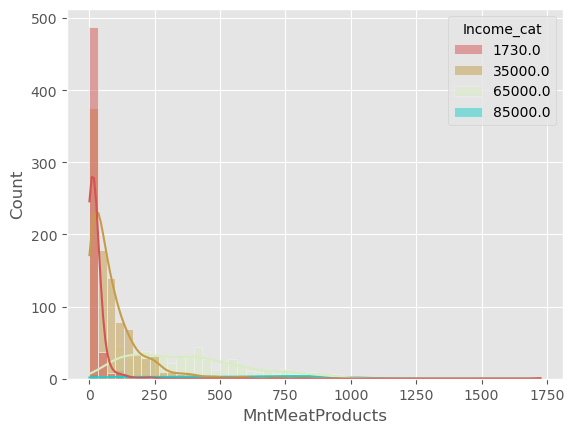

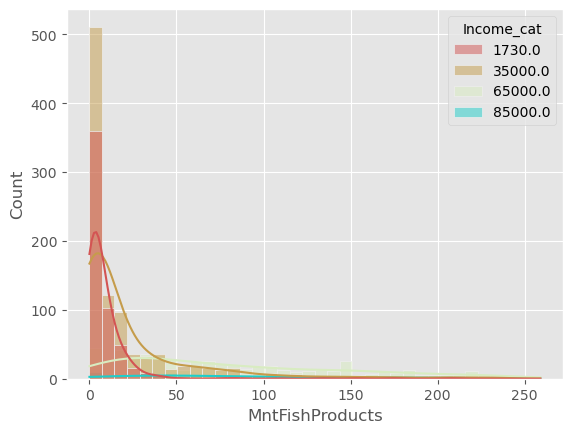

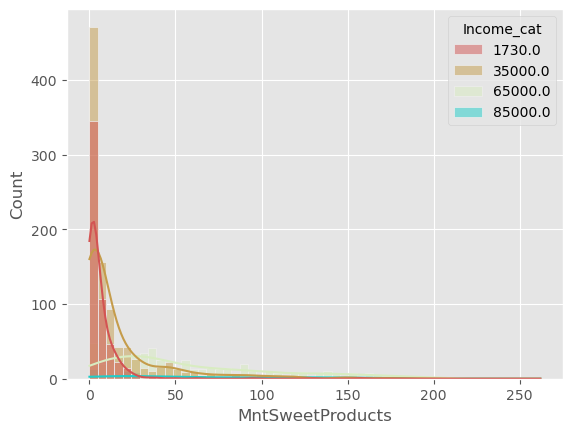

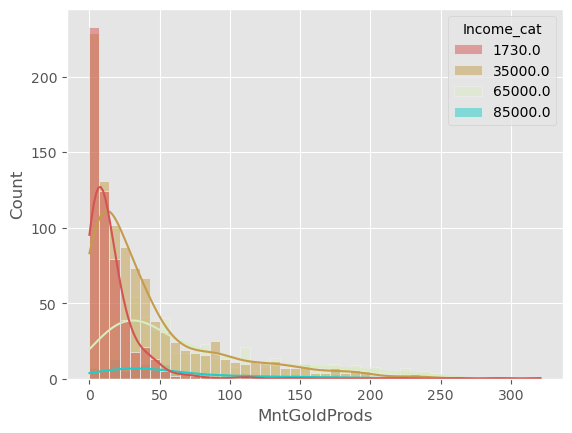

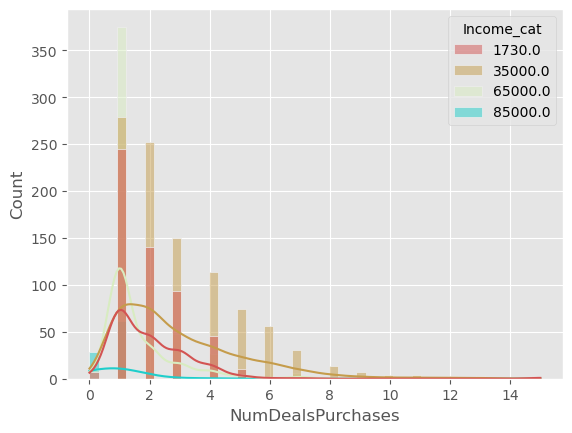

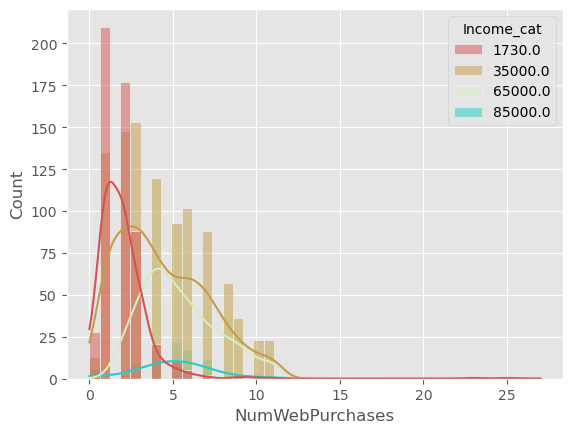

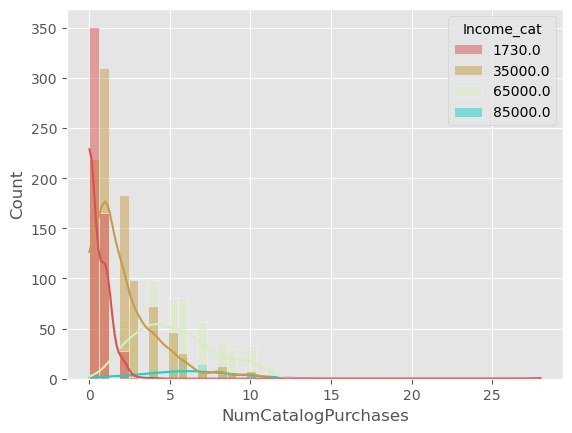

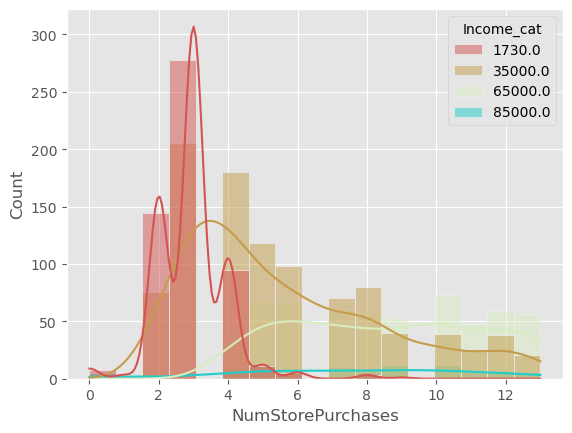

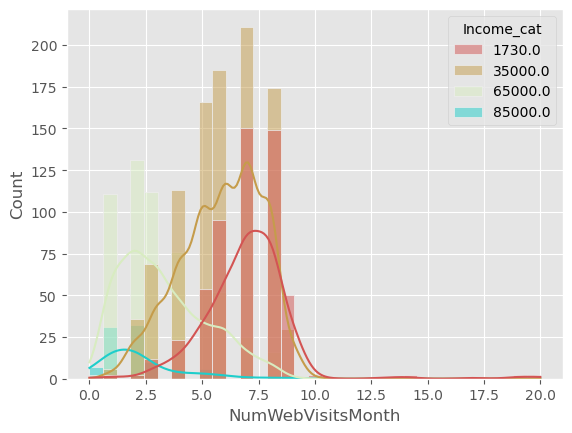

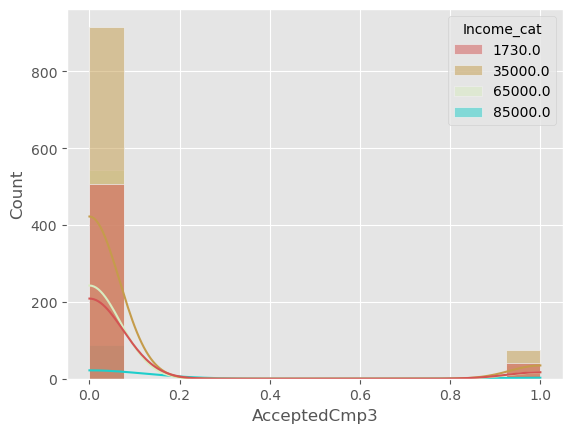

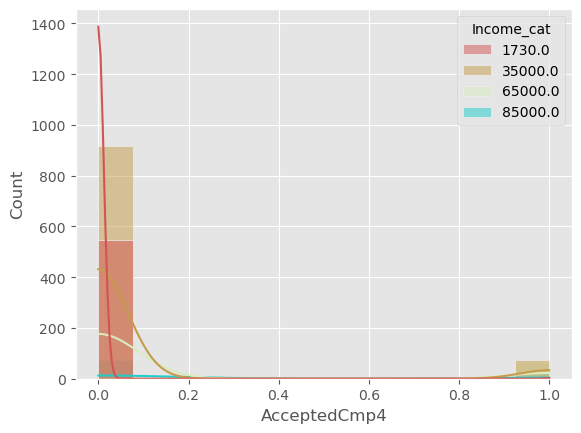

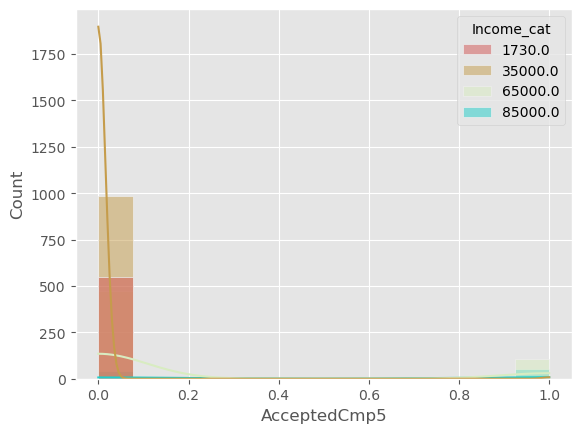

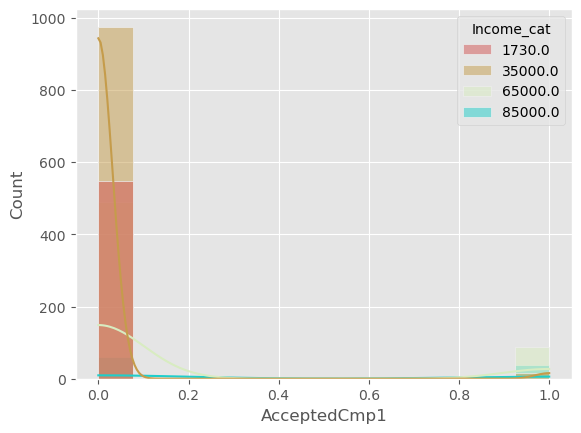

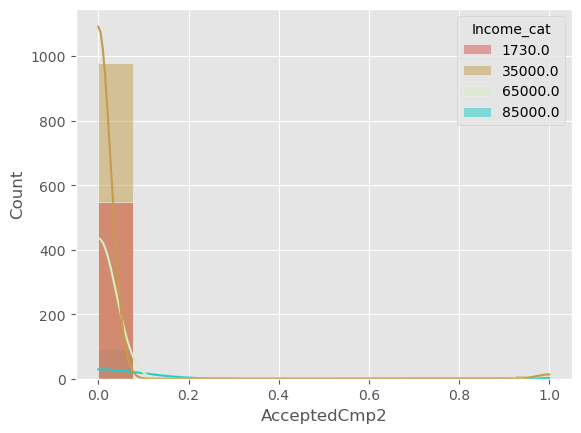

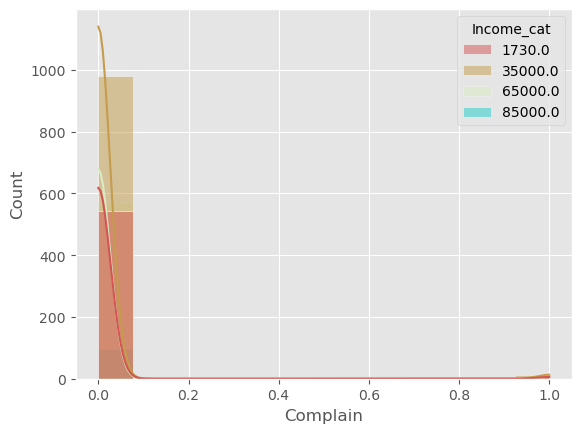

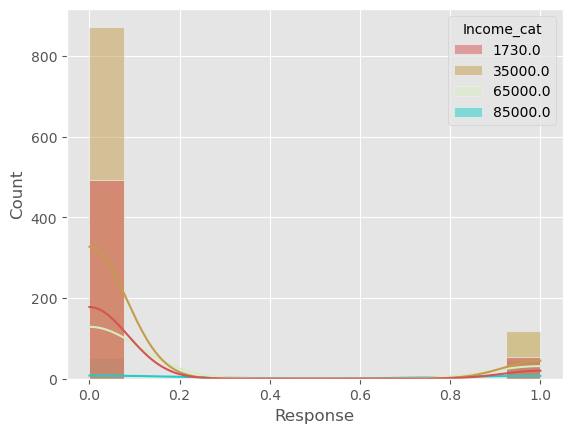

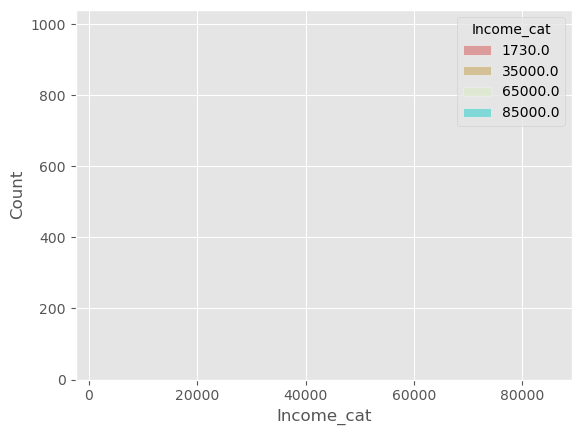

In [11]:
for feat in data.columns:
    if len(data[feat].unique()) > 1:
        if (data[feat].dtype != 'object') | (feat != 'Income_cat') | (feat != 'Month'):
            sns.histplot(data=data, x=feat, hue='Income_cat', palette=palette[:4], kde=True)
            plt.show()

In [14]:
grouped_data = data.groupby('Income_cat').agg({numeric_column: 'mean' for numeric_column in data.columns if pd.api.types.is_numeric_dtype(data[numeric_column])})
print(grouped_data)

                     ID   Year_Birth         Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
Income_cat                                                                                                                                                                                                                                                                                                                                                                                    
1730.0      5659.386861  1974.027372   25138.563869  0.791971  0.250000  48.156934   21.361314   5.950730        22.324818         8.591241          5.833942     16.266423           2.023723         2.003650             0.472628      

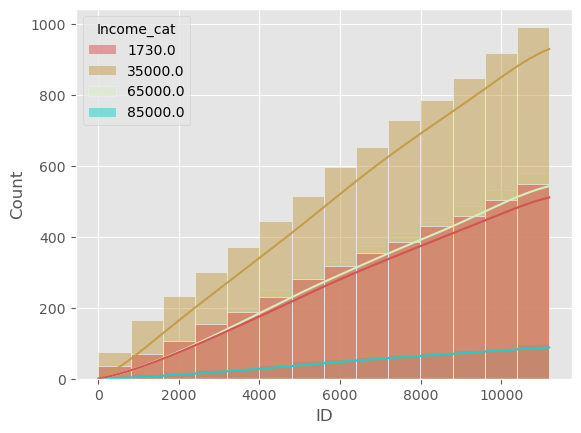

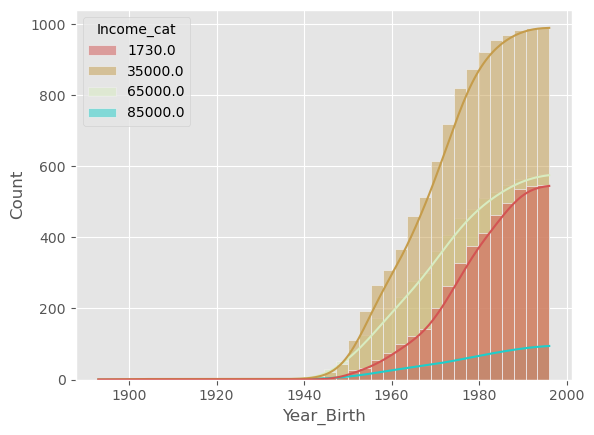

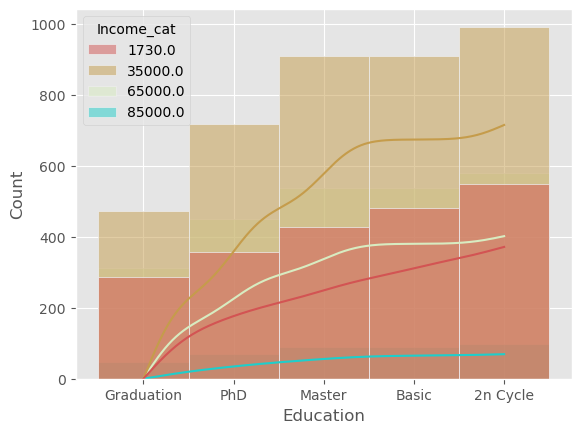

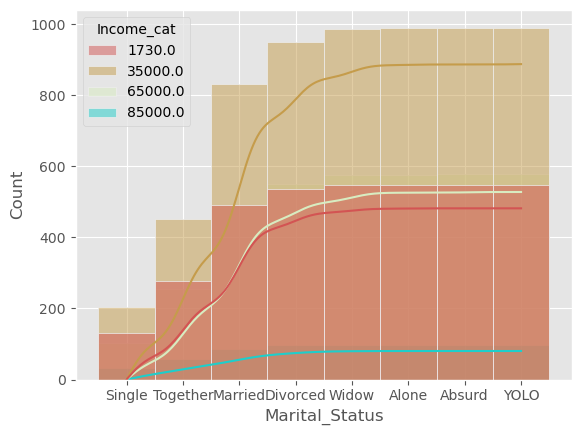

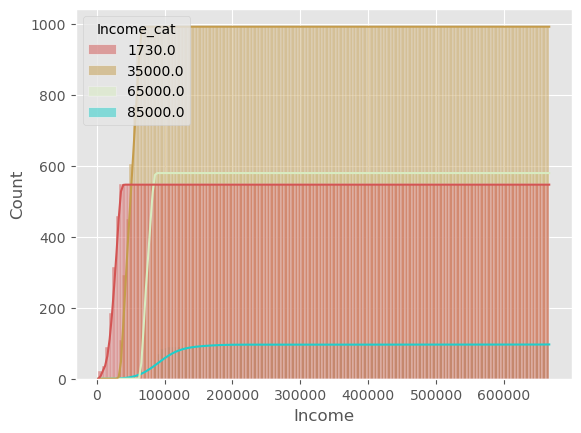

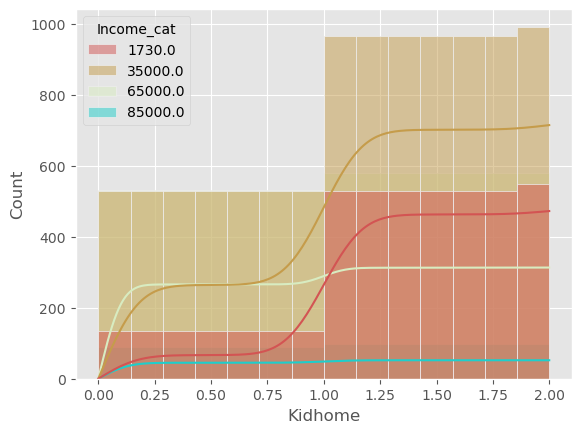

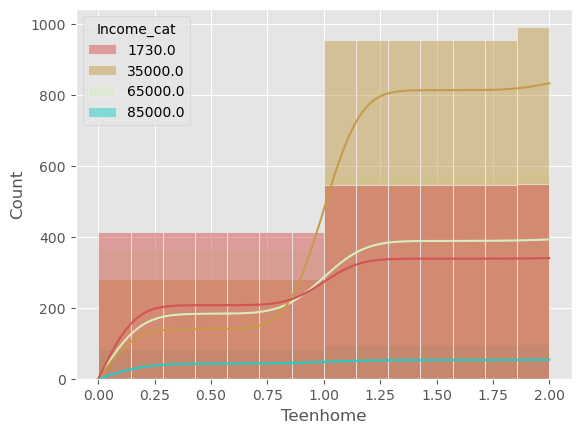

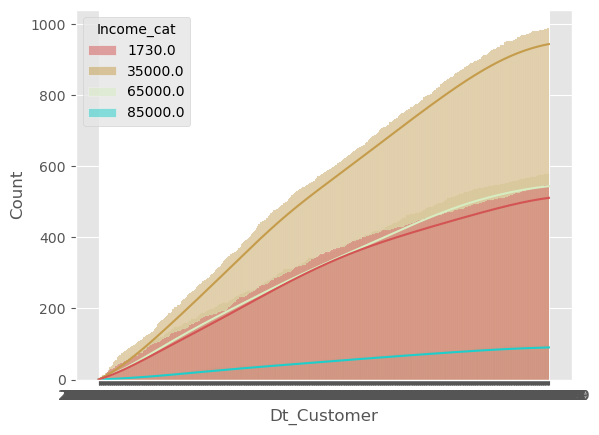

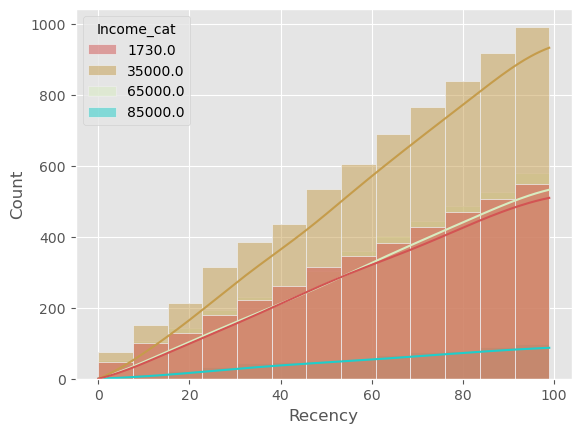

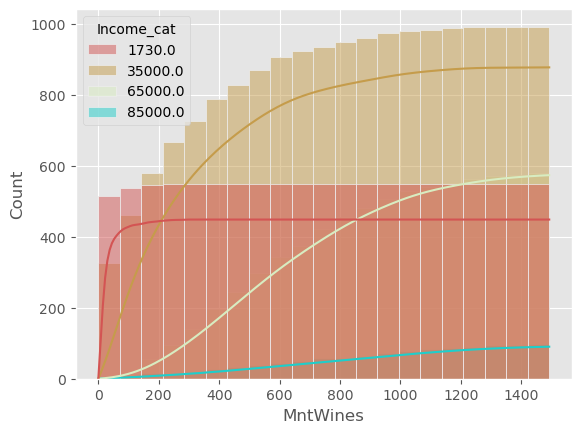

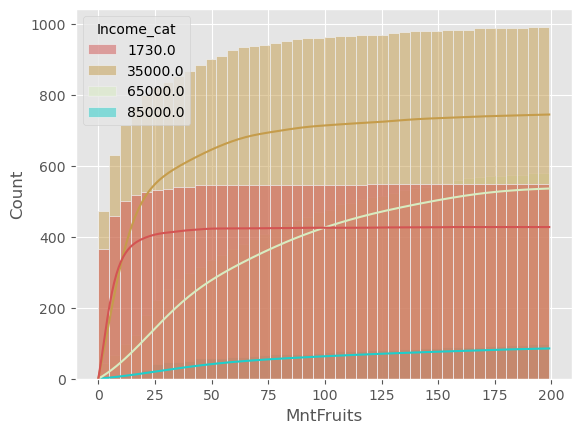

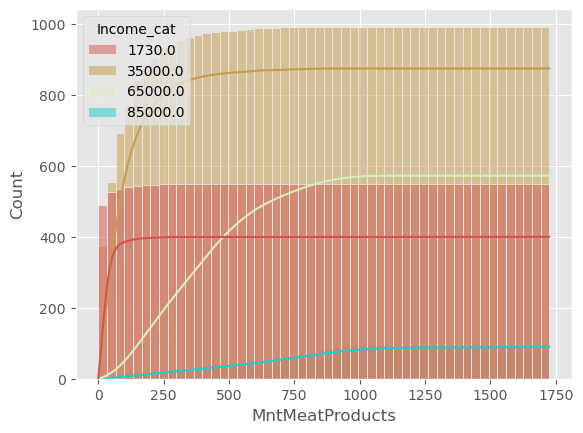

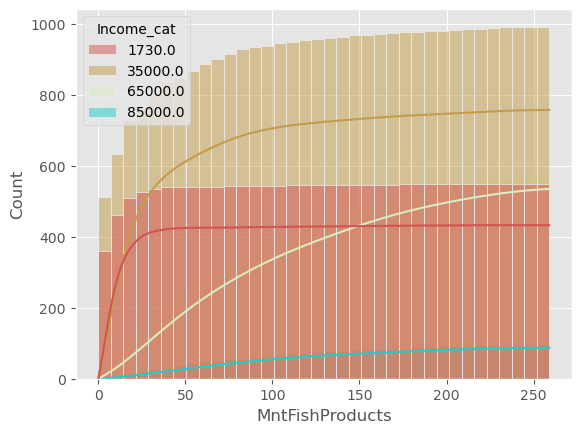

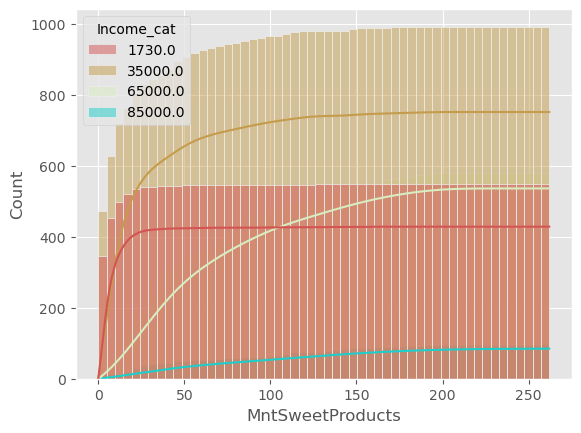

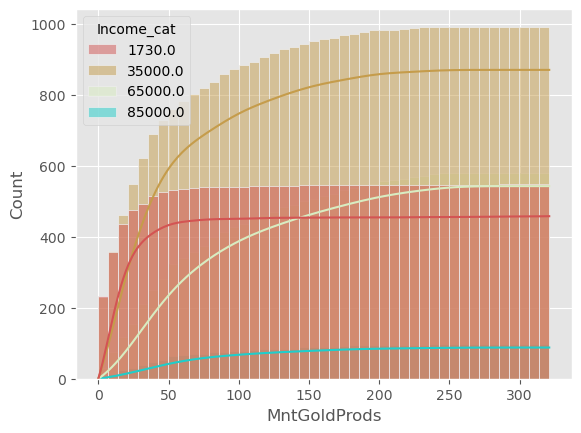

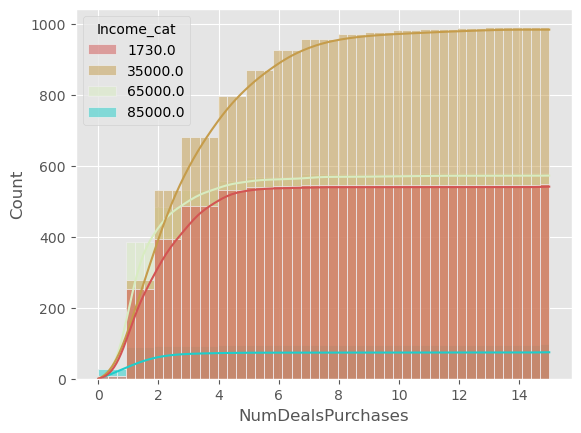

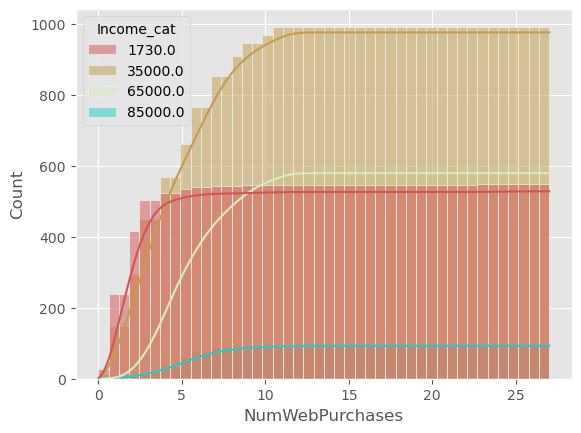

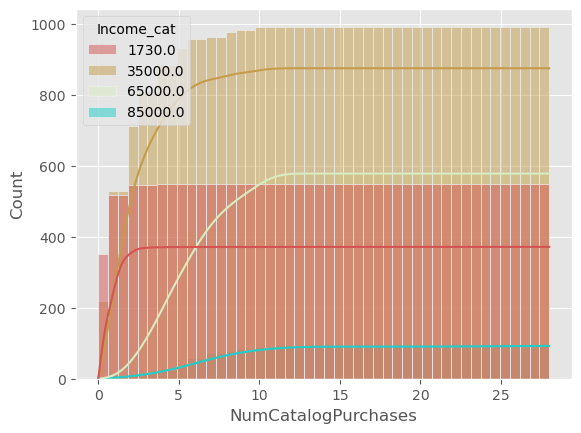

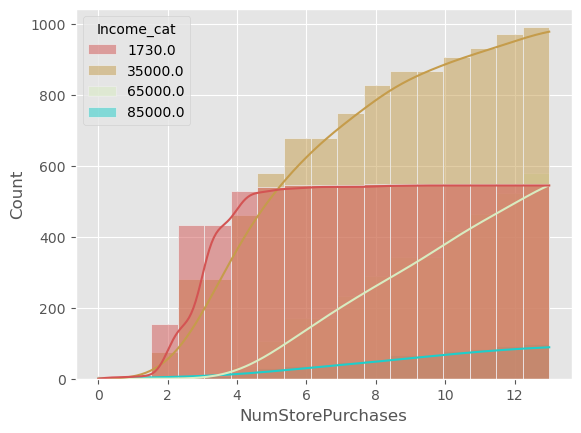

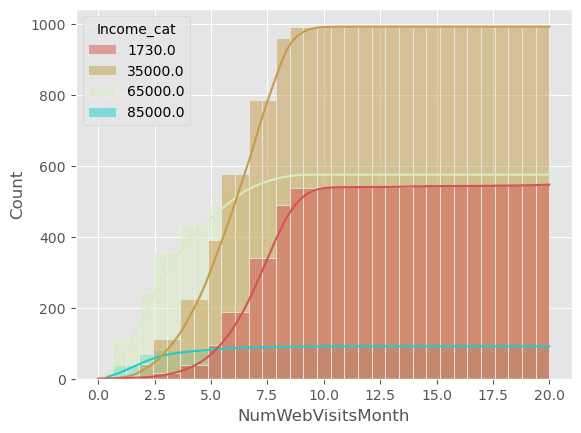

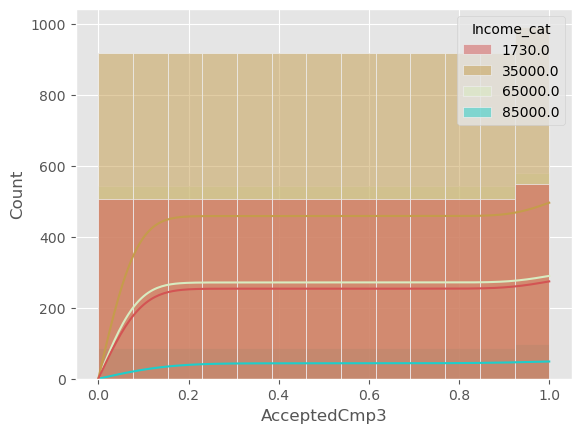

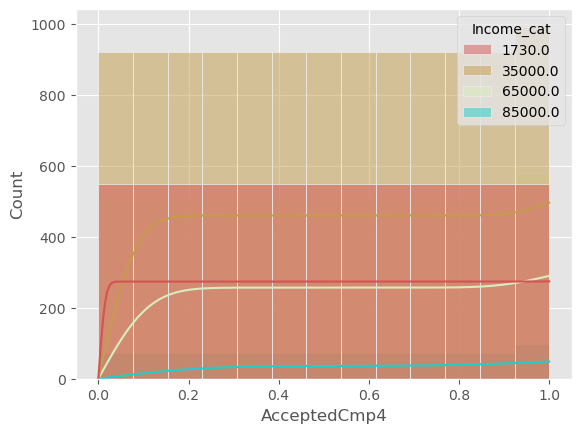

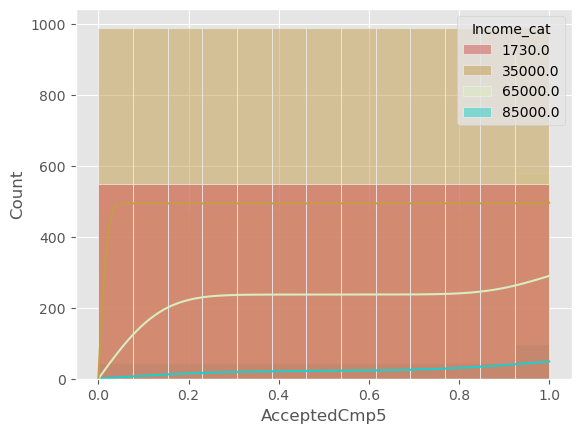

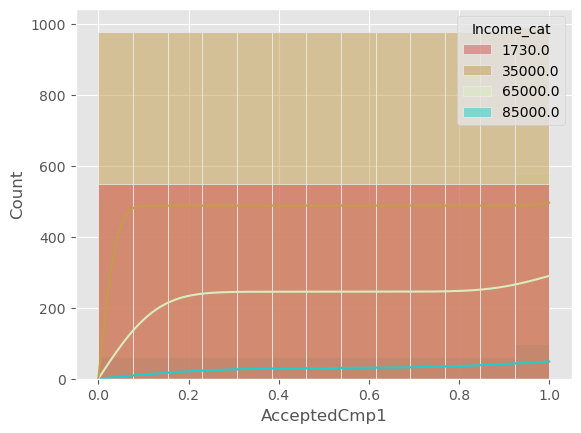

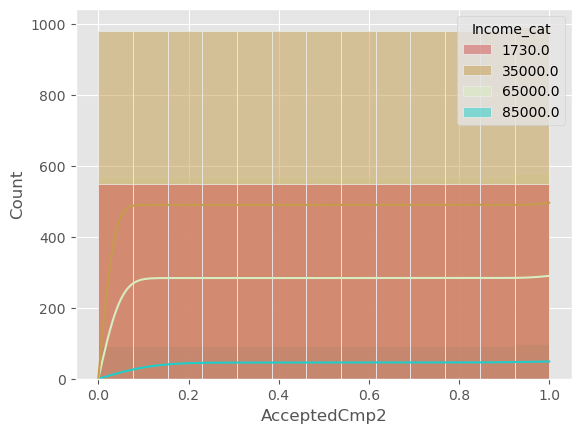

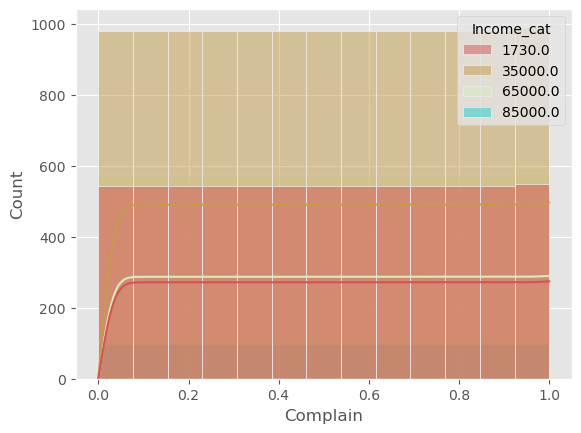

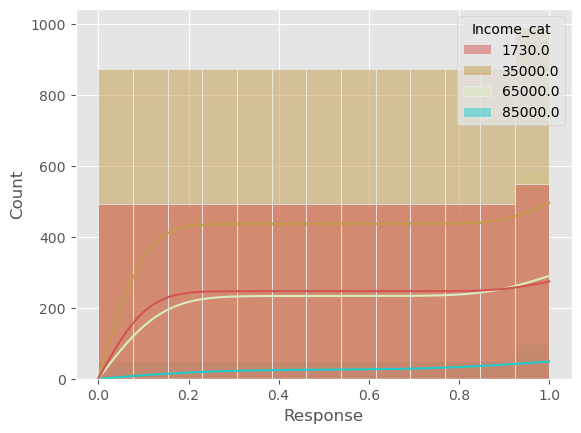

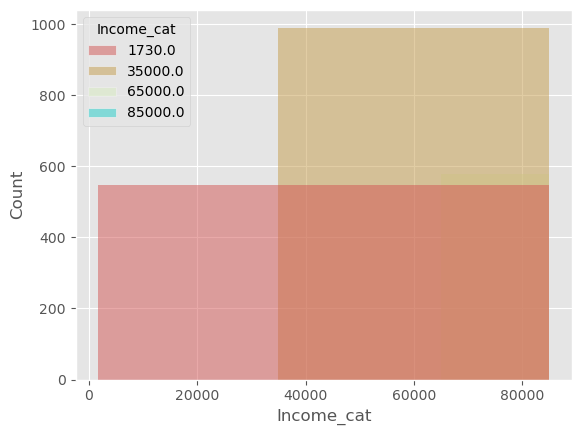

In [15]:
for feat in data.columns:
    if len(data[feat].unique()) > 1:
        if (data[feat].dtype != 'object') | (feat != 'Income_cat') | (feat != 'Month'):
            sns.histplot(data=data, x=feat, hue='Income_cat', palette=palette[:4], kde=True, cumulative=True)
            plt.show()

In [19]:
data.corrwith(data['Income']).sort_values(ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19828\1079795893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data['Income']).sort_values(ascending=False)


Income                 1.000000
NumCatalogPurchases    0.589162
MntMeatProducts        0.584633
MntWines               0.578650
NumStorePurchases      0.529362
MntSweetProducts       0.440744
MntFishProducts        0.438871
MntFruits              0.430842
NumWebPurchases        0.387878
AcceptedCmp5           0.335943
MntGoldProds           0.325916
AcceptedCmp1           0.276820
AcceptedCmp4           0.184400
Response               0.133047
AcceptedCmp2           0.087545
Teenhome               0.019133
ID                     0.013095
Recency               -0.003970
AcceptedCmp3          -0.016174
Complain              -0.027225
NumDealsPurchases     -0.083101
Year_Birth            -0.161791
Kidhome               -0.428669
NumWebVisitsMonth     -0.553088
Z_CostContact               NaN
Z_Revenue                   NaN
dtype: float64

#### Observation:
1. Year-birth - noticable lowest income to be later years, 2nd and 3rd quartile from earlier years, top quartile is from across years
2. Phd and Master are higher proportion on the highest in income
3. Marital_status - it seems to have no relationship with income
4. Kidhome - Top income quartile mostly have no children, 3rd quartile tend to have no children, 2nd and 1st quartile show tend to atleast have one children
5. Teenhome - 4th quartile shows mostly no children, 1st quartile shows weight to no children. 2nd quartile show high proportion of 1 or more teen at home
6. MntWines  - 3rd quartile shows high variance of highest amount of purchases
7. MntFruits - 3rd quartile shows high variance of highest amount of purchased
8. MntMeatProduct - extreme right side outliers from 1st quartile income. 3rd quartile again shows high variances of highest purchases
9. MntFishProducts - Outlier in all income group
10. MntSweetProducts - appears to have moderate positive correlation with income
11. MntGoldProducts - 3rd quartile purchases 10 more than the 4th quartile, 71 vs 61
12. MntDealsPurchase - 2nd quartile has a slight weight to more purchases than rest
13. NumWebPurchases - 2nd and 3rd quartile have weight to higher purchases
14. NumCatalogPurchases - 3rd and 4rd quartile 5x and 6x higher on avg
15. NumStorePurchases - 1st quartile shows distinctly low purchases. 4th quartile shows large variance
16. NumWebVisitMonth - 1st and 2nd quartile show high activity and 3rd and 4th group show low activity
17. Complain - no complain by top income group, most complain comes from 2nd income group
18. Month - no seasonality detected by month

#### Correlation with income:
1. NumCatalogPurchases, MntMeatProduct, MntWInes, NumStorePurchases, Show moderate positive relation with income
2. NumWebVisitMonth shows moderate negative correlation with income

In [21]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Income_cat'], dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   object  
 3   Marital_Status       2240 non-null   object  
 4   Income               2216 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [7]:
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Kidhome']].groupby('Kidhome').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,451.173241,39.392885,253.996133,56.162413,40.498840,60.037123
1,104.403782,8.517241,48.862069,12.311457,8.932147,22.408231
2,74.791667,6.770833,33.833333,7.729167,4.708333,17.416667


In [8]:
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Kidhome']].groupby('Kidhome').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,583367,50935,328417,72618,52365,77628
1,93859,7657,43927,11068,8030,20145
2,3590,325,1624,371,226,836


In [9]:
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Kidhome']].groupby('Kidhome').count()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,1293,1293,1293,1293,1293,1293
1,899,899,899,899,899,899
2,48,48,48,48,48,48


#### Observation:
1. No children at home is highest spending on all products with MntWines leading the product category purchases
2. With 1 children at home Wine, Meat, and gold are the popular
3. 2 children at home mostly spend on wine

In [10]:
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Teenhome']].groupby('Teenhome').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,304.822971,33.310017,227.120035,48.658031,33.631261,45.256477
1,300.009709,18.866990,101.432039,25.697087,20.233010,42.587379
2,361.942308,17.519231,124.769231,23.903846,16.076923,44.942308


In [11]:
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Teenhome']].groupby('Teenhome').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,352985,38573,263005,56346,38945,52407
1,309010,19433,104475,26468,20840,43865
2,18821,911,6488,1243,836,2337


In [12]:
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Teenhome']].groupby('Teenhome').count()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,1158,1158,1158,1158,1158,1158
1,1030,1030,1030,1030,1030,1030
2,52,52,52,52,52,52


#### Observation:
1. Wines are the most revenue generator among teenager acount

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   object  
 3   Marital_Status       2240 non-null   object  
 4   Income               2216 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

<Axes: >

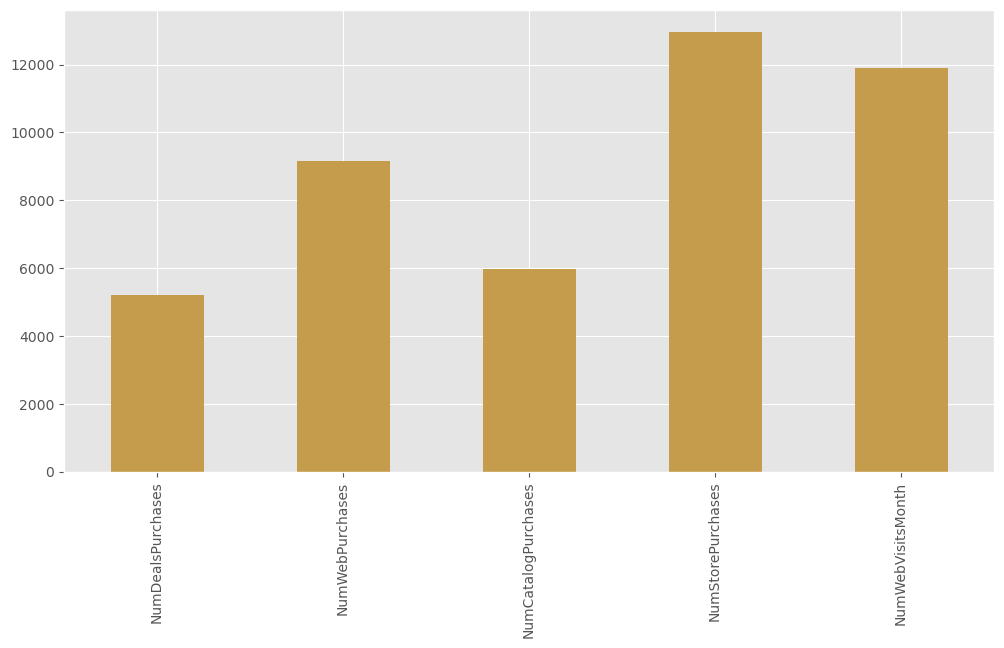

In [14]:
data[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].sum().plot(kind='bar',figsize=(12,6), color=palette[1])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   object  
 3   Marital_Status       2240 non-null   object  
 4   Income               2216 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [19]:
products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds']

<Axes: >

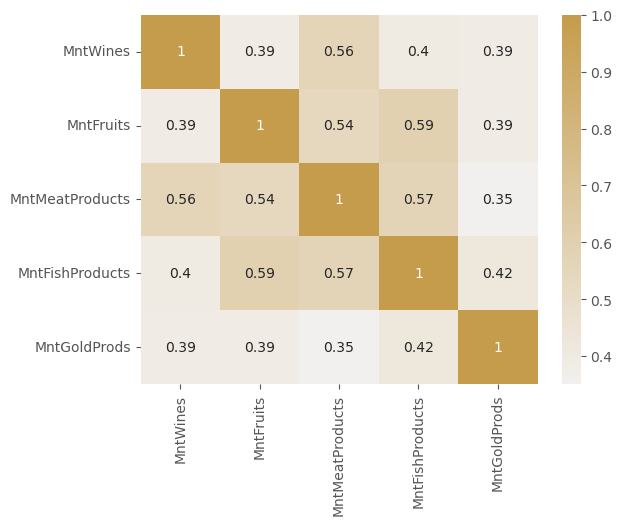

In [21]:
sns.heatmap(data[products].corr(), annot=True, cmap=sns.light_palette(palette[1], as_cmap=True))

#### Observation
1. Amount of fish and fruits sales have 0.59 correlation
2. Amount of wines and meat have a 0.56 correlation
3. Amount of meat and fish have 0.57 correlation

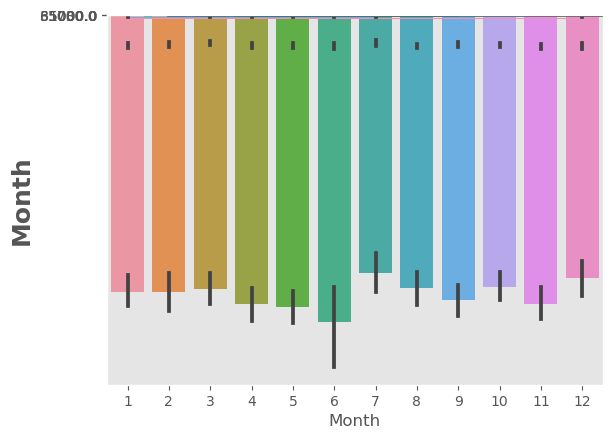

In [27]:
for i in data.columns:
    sns.barplot(data=data, x='Month', y=i)
    plt.ylabel(i, fontsize=18, fontweight='bold')
    plt.show

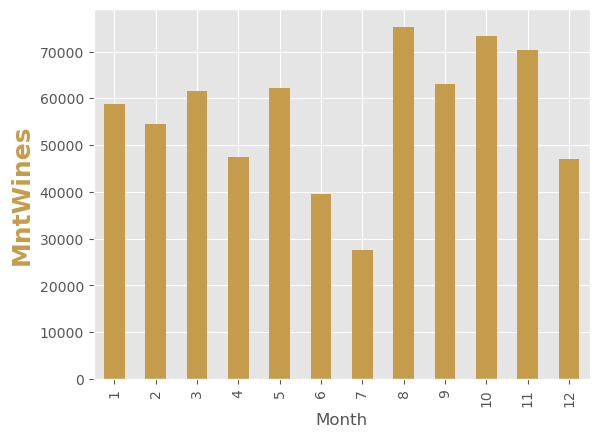

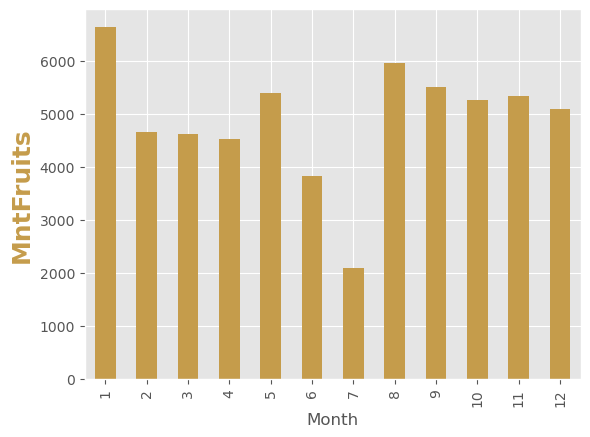

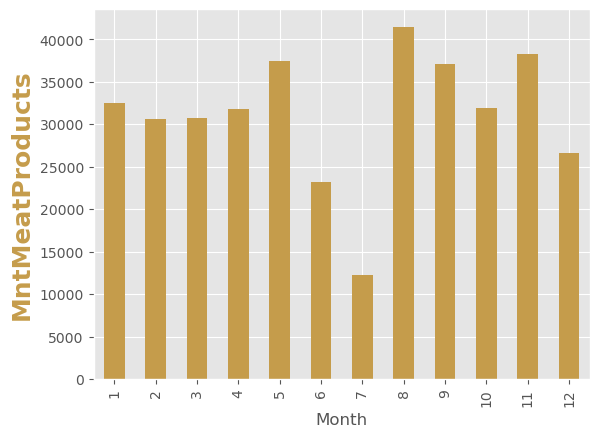

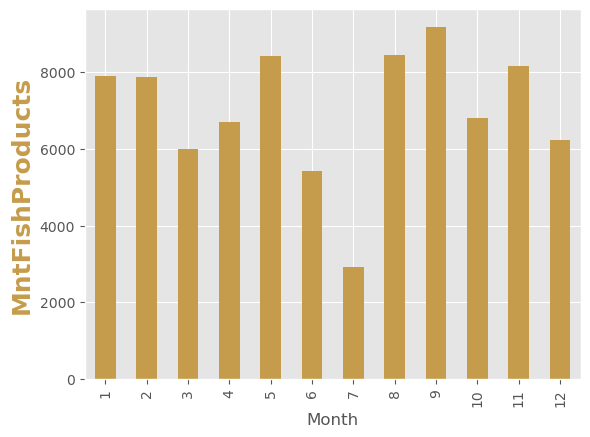

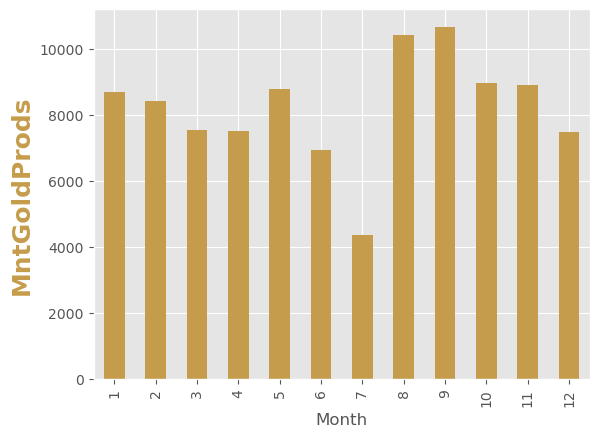

In [28]:
for i in products:
    data.groupby('Month')[i].sum().plot(kind='bar', color=palette[1])
    plt.ylabel(i, fontsize=18, fontweight='bold', color=palette[1])
    plt.show()

#### Observation
1. In general month 3 to 6 appear lower avg across products, where as month 9 to 2 are generally higher avg
2. Month 8 and 12 wines are popular
3. Fruits are popular in month 12,1,2
4. Meats product are have a low volume in month 7
5. Fish product high season from month 1 to 12, except in month 3 to 7
6. Gold follow similar patern to fish product, high season in month 1 to 12, except month 3 to 7

#### Promotion Targeting
1. Meat product at lowest income group during month 8 to 12
2. GOld product targeted 3rd and 4th income group by catalogue during month 8 to 2
3. Meat and fish product targeting 1st and 2nd income group during month 8 to 2
4. Offer large promotion on meat and fish to increase low month in july, greatly helping month revenue
5. Combo promotion of wine and meat to families with no children